# Introduction to Regression with Neural Network in TensorFlow

* Predicting a numerical variable based on some other combination of variables, predicting a number

In [36]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


# Create data to view and fit

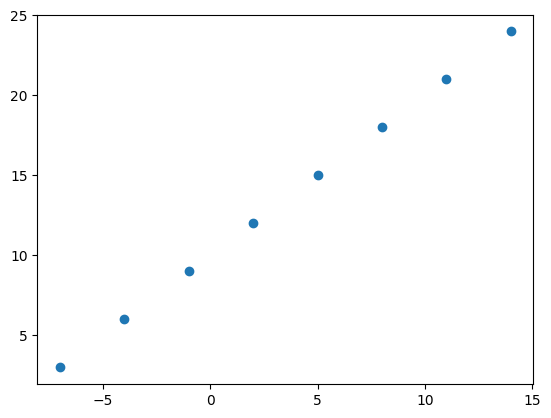

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [38]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [39]:
# Create a demo tensor for housing problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [40]:
X[0], y[0], X[1], y[0]

(-7.0, 3.0, -4.0, 3.0)

In [41]:
input_shape = X[0].shape
output_shape = y[1].shape
input_shape, output_shape

((), ())

In [42]:
X[0], y[0]

(-7.0, 3.0)

In [43]:
# Turn numpy arrays to tensors  with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [44]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

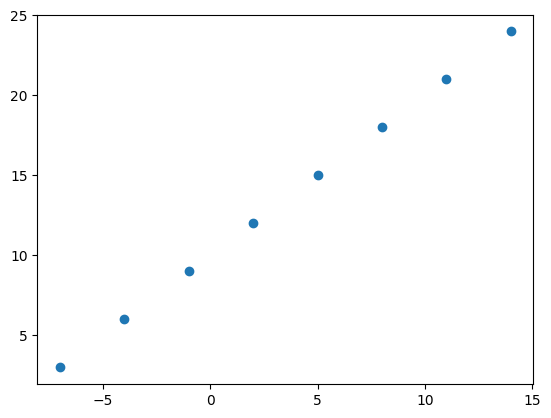

In [45]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model**: Define the input adn output layers, as well as the hidden layers as a deeplearning model
2. **Compiling a model**Define the loss function(how wrong the model is), Optimizer (tells our model how to improve the patterns), Evaluation ( interpret performance ) 
3. **Fitting the model** (model to find patterns (X, y)

In [46]:
# Set the seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 input per 1 output
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # sgd stochastic gradient descent
             metrics=["mae"]) 

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # given only 5 opportunities

Epoch 1/5
1/1 [==============================] - 0s 387ms/step - loss: 13.4444 - mae: 13.4444
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 13.3119 - mae: 13.3119
Epoch 3/5
1/1 [==============================] - 0s 41ms/step - loss: 13.1794 - mae: 13.1794
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 13.0469 - mae: 13.0469
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 12.9144 - mae: 12.9144


In [47]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [48]:
# Try and make a prediction using the model
y_pred= model.predict([2.0]) # 14 points off
y_pred

1/1 [==============================] - 0s 94ms/step


array([[0.4317478]], dtype=float32)

In [49]:
y_pred + 14.4

array([[14.831747]], dtype=float32)

## Improve the Model

We can improve the model by altering the steps taken to create the model, compile the model, fit the model
1. **Creating the model** - we can add more layers, increase the number of hidden units( all called neurons ) 
 within each of the hidden layers, change the activation function of the layers 
2. **Compiling the model** - we can change the optimization function, the **learning rate**, 
3. **Fitting the model** - might fit the model for more epochs (train the model longer ) give the model more examples to learn from

In [50]:
# Let's rebuild the model to a larger model with modifications to it

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model ( we will train the model for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 394ms/step - loss: 8.6863 - mae: 8.6863
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5538 - mae: 8.5538
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 8.4213 - mae: 8.4213
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 8.2888 - mae: 8.2888
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 8.1563 - mae: 8.1563
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 8.0238 - mae: 8.0238
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8913 - mae: 7.8913
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 7.7588 - mae: 7.7588
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.6263 - mae: 7.6263
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 7.4938 - mae: 7.4938
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - l

In [51]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [52]:
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[30.105906]], dtype=float32)

In [53]:
# Recreate the model but change the Optimizer ( how the model should update its internal patterns)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 425ms/step - loss: 19.4258 - mae: 19.4258
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 19.4198 - mae: 19.4198
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 19.4138 - mae: 19.4138
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 19.4078 - mae: 19.4078
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 19.4018 - mae: 19.4018
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 19.3958 - mae: 19.3958
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 19.3898 - mae: 19.3898
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 19.3838 - mae: 19.3838
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 19.3778 - mae: 19.3778
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 19.3718 - mae: 19.3718
Epoch 11/100
1/1 [==============================] 

In [54]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [55]:
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[-19.816847]], dtype=float32)

In [56]:
# Create anothe model using neurons on a hidden layer

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 461ms/step - loss: 13.9475 - mae: 13.9475
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4564 - mae: 13.4564
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 12.9650 - mae: 12.9650
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 12.4839 - mae: 12.4839
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 12.0013 - mae: 12.0013
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 11.5146 - mae: 11.5146
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0176 - mae: 11.0176
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4946 - mae: 10.4946
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 9.9490 - mae: 9.9490
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 9.3748 - mae: 9.3748
Epoch 11/100
1/1 [==============================] - 

In [57]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [58]:
model.predict([17.0])

1/1 [==============================] - 0s 127ms/step


array([[32.02165]], dtype=float32)

## Evaluating a TensorFlow Model

In practice, a typical workflow when building neural network is,
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it....
```

When it comes to evaluation... 3 words to remember: 
    "Visualize, Visualize, Visualize"

### Visualize
* The data -> what data are we working with? What does it look like?
* The model -> what does our model look like? 
* The training model -> how does a model perform while it learns? 
* Predictions of the model

In [59]:
# Make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [60]:
# Make labels in the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

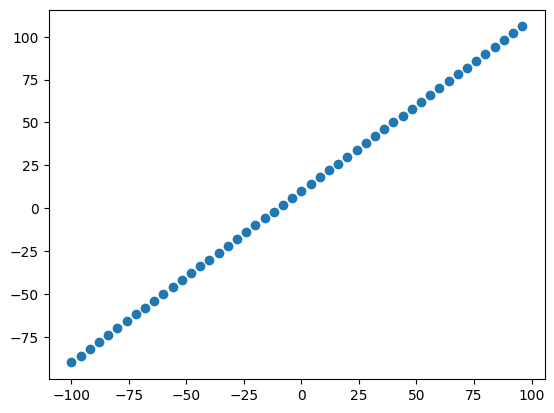

In [61]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training Set** - the model learns from this piece of this data (70 - 80%)
* **Validation Set** - the model gets tuned ( tweaked ) on this data, 10-15% on the data available
* **Test Set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of data available

In [62]:
# Check the n length of the samples 
len(X)

50

In [63]:
# Split the data in train and test sets
X_train = X[:40] # this is the first 40 in the test (80% percent of the data)
y_train = X[:40]  

X_test = X[40:]  # the last 10 samples of the test (20% perecent of the data)
y_test = X[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the Data

Now let's visualize the test, train sets

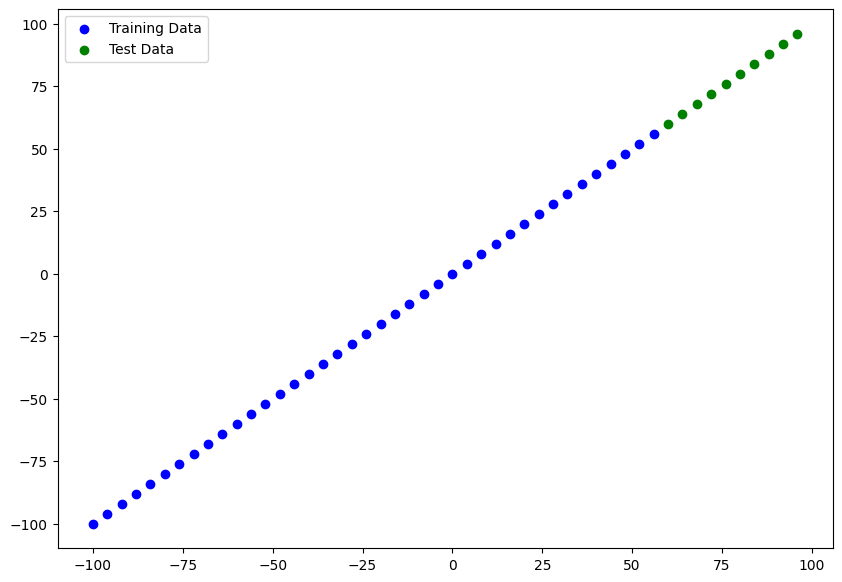

In [64]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")

plt.legend();

In [65]:
# Build a neural network

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the Model

In [66]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [67]:
X[0].shape, X[0].shape

(TensorShape([]), TensorShape([]))

In [68]:
# Create a model which builds given an input shape  'given 1 value for 1 output'
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             metrics=["mae"])

In [69]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params: total number of parameters in the model ( X and Y ) in this case
* Trainable params: these are the parameters ( patterns ) the model can update is it trains
* Non-trainable params: aren't updated during training, when you bring in already learned patterns (patterns) other models during **transfer learning**

In [70]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [71]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing Model Predictions

It is a good idea to to plot the predictions against the ground truth labels
    `y_test` vs the `y_pred`

In [72]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 66ms/step


array([[60.3113  ],
       [64.381836],
       [68.45237 ],
       [72.522896],
       [76.59343 ],
       [80.66396 ],
       [84.7345  ],
       [88.80503 ],
       [92.87556 ],
       [96.9461  ]], dtype=float32)

In [73]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

**Re-use a functionality in the future, turn it into a function**

In [74]:
# Create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test, 
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data, and compares prediction to ground truth
    """

    plt.figure(figsize=(10, 7))

    # Plot the training data
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot the test data
    plt.scatter(test_data, test_labels, c="g", label="Testing data")

    # Plot the predictions
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    plt.legend()


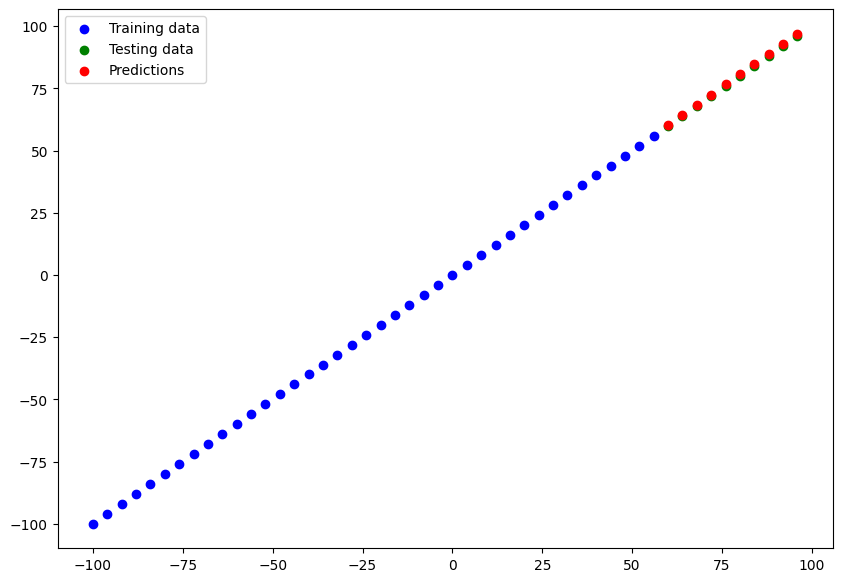

In [75]:
plot_predictions()

### Evaluating model predictions with regression evaluation metrics

Depending on the problem presented to make metric evaluation's

* MAE - mean absolute error " on average, how wrong is each of my model predictions"
* MSE - mean square error, "Square the average erros"

In [76]:
# Evaluate the model on the test

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 179ms/step - loss: 0.6287 - mae: 0.6287


[0.6286975741386414, 0.6286975741386414]

In [77]:
# Calculate MAE in the problem
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

# Note this was given many values since the tensors are not the same shape

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.750961 , 14.570898 , 12.219052 , 10.695421 , 10.       ,
       10.132792 , 11.093799 , 12.8830185, 15.500445 , 18.946098 ],
      dtype=float32)>

In [78]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.6286976>

In [79]:
# Calculate the Mean Square Error
mse = tf.keras.losses.mean_squared_error(y_true=y_test, 
                                         y_pred=tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.43630323>

In [80]:
# Make functions for MAE and MSE
def calculate_mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def calculate_mse(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiements to improve the model

```
Build a model -> evaluate it -> tweak it -> evaluate it -> tweak it .....
```

1. Get more examples... more opportunities to learn patterns from features and labels
2. Make the model more complex ( more layers, hidden units, )
3. Train the model for longer enoch, more of a chance to find patterns in the data

Design 3 model experiements:
1. `model_1` - same as the original mode, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [81]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>)

**Build `model_1`**

In [82]:
# Set random_seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 34.1539 - mae: 34.1539
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 5.1783 - mae: 5.1783
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 6.4282 - mae: 6.4282
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 6.2899 - mae: 6.2899
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 6.2734 - mae: 6.2734
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 3.8420 - mae: 3.8420
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 5.6785 - mae: 5.6785
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 5.4260 - mae: 5.4260
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 10.5335 - mae: 10.5335
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 13.1220 - mae: 13.1220
Epoch 11/100
2/2 [==============================] - 0s 16ms/step - 

1/1 [==============================] - 0s 55ms/step


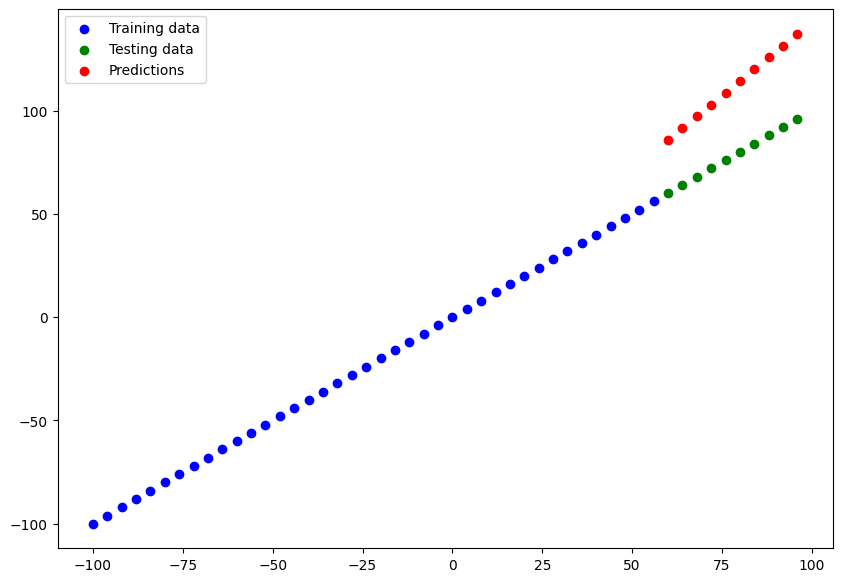

In [83]:
# Make and plot predictions on model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [84]:
# Calculate the evaluation metrics
mae_1 = calculate_mae(y_test, y_preds_1)
mse_1 = calculate_mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=33.435516>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1142.2002>)

In [85]:
y_test, y_preds_1

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 array([[ 85.71783 ],
        [ 91.43287 ],
        [ 97.14791 ],
        [102.86295 ],
        [108.577995],
        [114.29304 ],
        [120.00808 ],
        [125.72312 ],
        [131.43817 ],
        [137.15321 ]], dtype=float32))

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [86]:
# SET seed 
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 60.1747 - mse: 6046.9717
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 42.8552 - mse: 3206.5845
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 54.2906 - mse: 4773.6284
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 26.6529 - mse: 1010.4479
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8644 - mse: 193.9285
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 16.2075 - mse: 372.8699
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 16.7359 - mse: 415.7640
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 19.2455 - mse: 550.2780
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 43.1651 - mse: 3090.6506
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.6687 - mse: 1097.6055
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 57ms/step


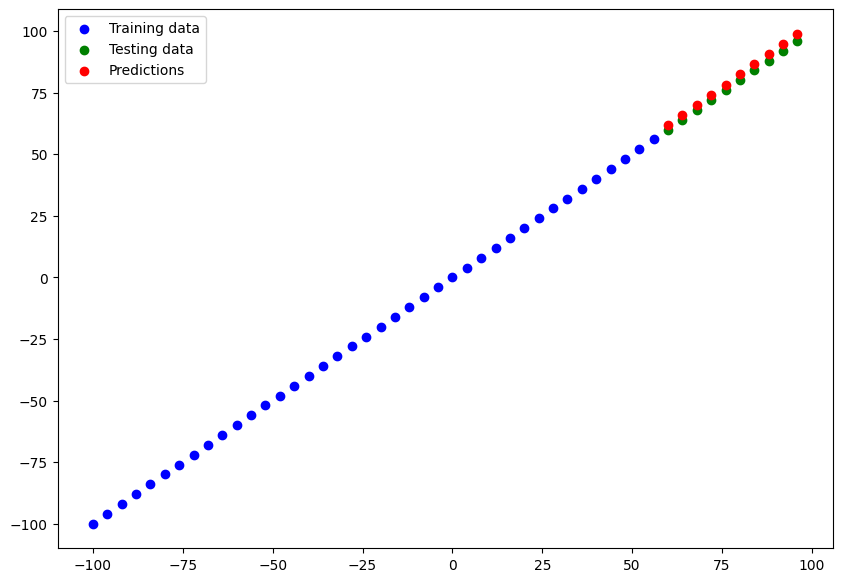

In [87]:
# Visualize (make and plot predictions) model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [88]:
# Calculate model_2 evaluation predictions
mae_2 = calculate_mae(y_test, y_preds_2)
mse_2 = calculate_mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3020508>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.4224663>)

**Build `model_3`**
* 2 dense layers, trained for 500 epochs

In [89]:
# Set the seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 34.9122 - mse: 1810.6746
Epoch 2/500
2/2 [==============================] - 0s 22ms/step - loss: 27.1865 - mse: 1253.9690
Epoch 3/500
2/2 [==============================] - 0s 19ms/step - loss: 36.1184 - mse: 1989.0508
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 18.7378 - mse: 508.4874
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 9.5111 - mse: 333.4589
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 12.1685 - mse: 270.7342
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 13.7190 - mse: 287.5917
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 14.4840 - mse: 337.1036
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 35.0899 - mse: 1755.3818
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 14.6421 - mse: 305.4275
Epoch 11/500
2/2 [======================

1/1 [==============================] - 0s 58ms/step


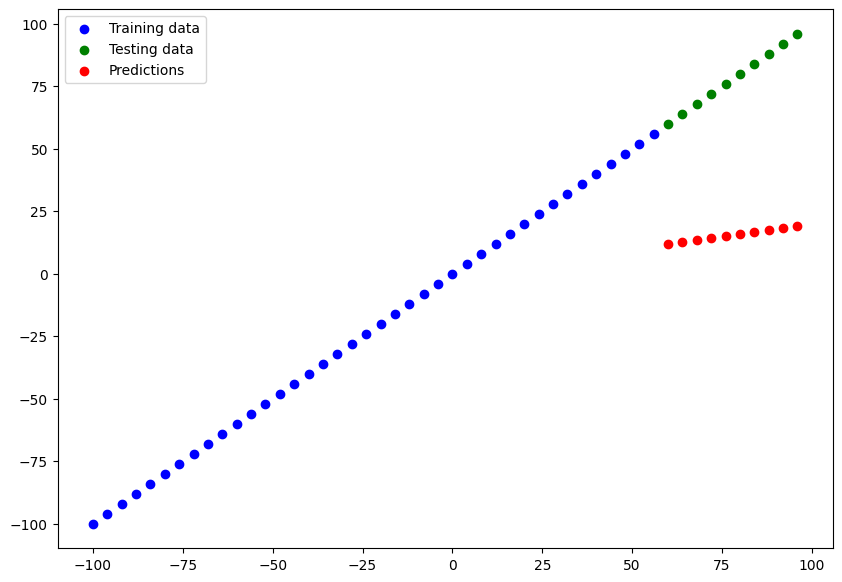

In [90]:
# Visualize (make and plot predictions) model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [91]:
# Calculate model_2 evaluation predictions
mae_3 = calculate_mae(y_test, y_preds_3)
mse_3 = calculate_mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=62.55489>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3997.3313>)

### Comparing the results in the Experiement 

In [92]:
# Lets create a pandas dataframe 
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,33.435516,1142.200195
1,model_2,2.302051,5.422466
2,model_3,62.554890,3997.331299


In [93]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking the experiments 

* Good habit in machine learning modeling is to 
track the results of the experiments.

* Can be tedious

* TensorBoard - a component of the TensorFlow library to help keep track 

* Weights and Biases - a tool for tracking all of kinds of machine learning experiments

## Saving a model

Saving a model allows to use outside of where they were trained... web app, mobile etc..

* There are two formats to save a TensorFlow model
1. SaveModel format
2. HDF5 format

In [94]:
# Save a model using the SaveModel format
model_2.save("model_2_save_format")

INFO:tensorflow:Assets written to: model_2_save_format/assets


INFO:tensorflow:Assets written to: model_2_save_format/assets


In [95]:
# Save the model in the HDF5 standard - design to store large amount of Data
model_2.save("model_2_format_HDF5.h5")

### Load the model back in here.. how??

In [96]:
import os

# Get the current working directory
current_dir = os.getcwd()

print(current_dir)

/Users/daviedev/TensorFlow


In [97]:
# Load in the SavedModel format
load_saved_model = tf.keras.models.load_model("/Users/daviedev/TensorFlow/model_2_save_format")
load_saved_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [98]:
load_saved_model.summary() == model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params:

True

In [99]:
# Load in the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/Users/daviedev/TensorFlow/model_2_format_HDF5.h5")
loaded_h5_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Check the predictions are the same
model_2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_preds

1/1 [==============================] - 0s 69ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Larger Example Project 

In [101]:
# Import the needed libraries 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# Read in the data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [103]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [104]:
insurance["smoker"], insurance['age']

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [105]:
# One-hot encoding 
insurance=pd.get_dummies(insurance)
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [106]:
# Create X and y values (features and labels)
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [107]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [108]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [109]:
# Build a neural network (model)
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

# 3. fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13227.1387 - mae: 13227.1387
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12299.5166 - mae: 12299.5166
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12172.9189 - mae: 12172.9189
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12097.7637 - mae: 12097.7637
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11982.8506 - mae: 11982.8506
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 11796.1641 - mae: 11796.1641
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 11470.3906 - mae: 11470.3906
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 10959.6621 - mae: 10959.6621
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 10344.8594 - mae: 10344.8594
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 9702.239

In [110]:
# Visualize the model plot 

In [111]:
# Check the results on the test data 
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8925.5107 - mae: 8925.5107


[8925.5107421875, 8925.5107421875]

In [112]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

 * The model is not performing well :(
 
Experiment with different models to get the best result!!
1. Add an extra layer to the model
2. Train for longer the model (epochs = 500)
3. Set SGD -> Adam(lr=0.0001)

**Build** `insurance_model_2`

In [113]:
# Seed
tf.random.set_seed(42)

# Build
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"])
# Fit
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12615.0420 - mae: 12615.0420
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 11729.1240 - mae: 11729.1240
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 11195.3584 - mae: 11195.3584
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 10600.3242 - mae: 10600.3242
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10362.6846 - mae: 10362.6846
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9599.0527 - mae: 9599.0527
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 9578.3516 - mae: 9578.3516
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 9572.4844 - mae: 9572.4844
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 9161.4258 - mae: 9161.4258
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 9510.1436 - mae:

In [114]:
# Check the results on the test data 
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 9927.1328 - mae: 9927.1328


[9927.1328125, 9927.1328125]

**Build** `insurance_model_3`

In [115]:
# Seed
tf.random.set_seed(42)

# Build
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"])
# Fit
insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 12631.5762 - mae: 12631.5762
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 11761.2061 - mae: 11761.2061
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 11721.4854 - mae: 11721.4854
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 10513.7852 - mae: 10513.7852
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 10636.6367 - mae: 10636.6367
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 9884.9951 - mae: 9884.9951
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 9672.0664 - mae: 9672.0664
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 9639.7900 - mae: 9639.7900
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 9779.9336 - mae: 9779.9336
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 10324.9316 - mae

In [116]:
# Check the results on the test data 
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 10520.6270 - mae: 10520.6270


[10520.626953125, 10520.626953125]

Performed worse when increase the amount of times to train from 100 -> 500

**Build** `insurance_model_4`

In [117]:
# Seed
tf.random.set_seed(42)

# Build
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
# Fit
history = insurance_model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=150)

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: 13339.6357 - mae: 13339.6357
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 13317.9971 - mae: 13317.9971
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 13277.0352 - mae: 13277.0352
Epoch 4/150
34/34 [==============================] - 0s 4ms/step - loss: 13201.4961 - mae: 13201.4961
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 13074.8955 - mae: 13074.8955
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 12885.6025 - mae: 12885.6025
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 12643.3369 - mae: 12643.3369
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 12384.8330 - mae: 12384.8330
Epoch 9/150
34/34 [==============================] - 0s 4ms/step - loss: 12184.7715 - mae: 12184.7715
Epoch 10/150
34/34 [==============================] - 0s 3ms/step - loss: 12108.28

In [118]:
# Check the results on the test data 
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8627.3516 - mae: 8627.3516


[8627.3515625, 8627.3515625]

Text(0.5, 0, 'epochs')

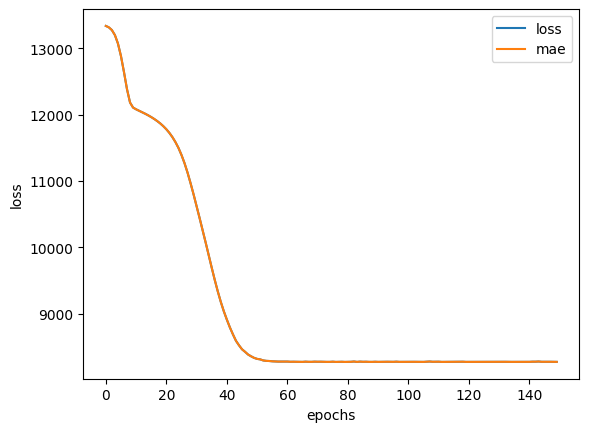

In [119]:
# Plot history 
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [120]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

### Preprocessing Data (normalization & standarization)

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot: ylabel='Frequency'>

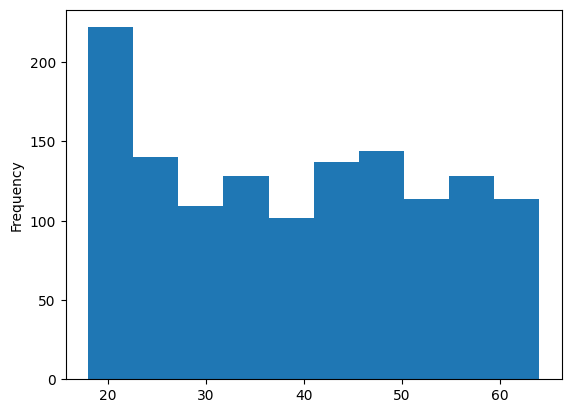

In [134]:
X["age"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

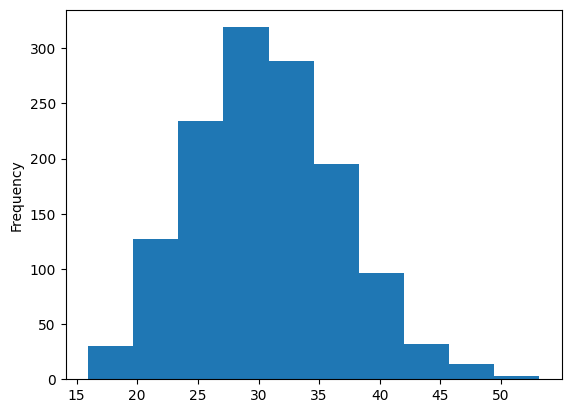

In [135]:
X["bmi"].plot(kind="hist")

<AxesSubplot: ylabel='Frequency'>

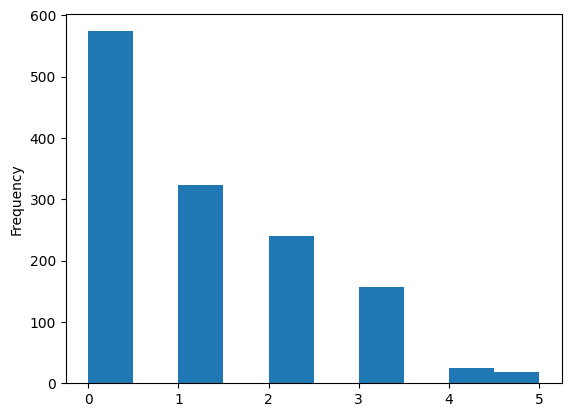

In [124]:
X["children"].plot(kind="hist")

In [126]:
matrix = X.corr()
matrix

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
sex_female,0.020856,-0.046371,-0.017163,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,-0.017117,0.017117,-0.068498,0.068498,-0.345561,-0.346265,1.000000,-0.346265


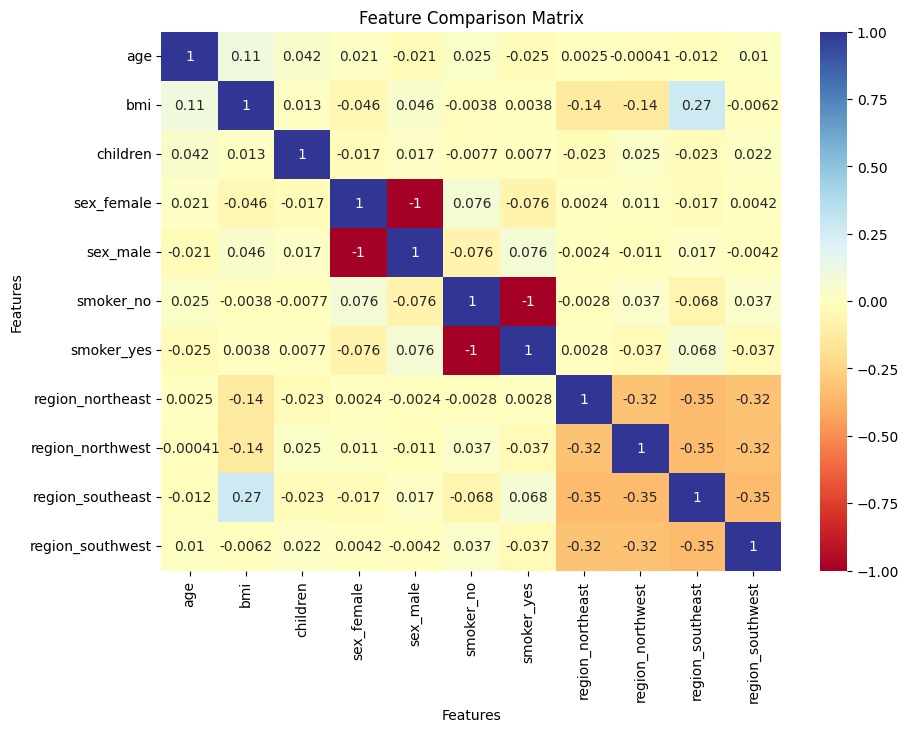

In [128]:
import seaborn as sns


plt.figure(figsize=(10, 7))

# Create a heatmap using seaborn
sns.heatmap(matrix, annot=True, cmap='RdYlBu')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Comparison Matrix')

# Show the heatmap
plt.show()

In [129]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


### Prepare the data using the Scikit-Learn library

In [139]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Create a column transformer
# These are the feature columns
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]), # turn all these values into 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and Y values
X = insurance.drop("charges", axis=1) # 
y = insurance["charges"]

# Model to learn from Train Data and Evaluate it on Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [140]:
# WHAT does the data look like 
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [141]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [142]:
# Shape of the data
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

### Build a NN to fit on the noramlized data

In [151]:
# Set seed
tf.random.set_seed(42)


# Build the model
insurance_train = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_train.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])

# Fit the model
insurance_train= insurance_train.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13345.2969 - mae: 13345.2969
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13342.5439 - mae: 13342.5439
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13336.1055 - mae: 13336.1055
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13322.8438 - mae: 13322.8438
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13299.5195 - mae: 13299.5195
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13263.0732 - mae: 13263.0732
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 13210.7314 - mae: 13210.7314
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13139.8271 - mae: 13139.8271
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 13047.7031 - mae: 13047.7031
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 12931.83

In [155]:
score = insurance_train.score(X_test_normal, y_test)
print("Model score:", score)

AttributeError: 'History' object has no attribute 'score'

In [148]:
insurance_model.summary(), insurance_model_2.summary(), insurance_model_3.summary(), insurance_model_4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 11, 10)            20        
                                                                 
 dense_18 (Dense)            (None, 11, 1)             11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 11, 100)           200       
                                                                 
 dense_20 (Dense)            (None, 11, 10)            1010      
                                                                 
 dense_21 (Dense)            (None

(None, None, None, None)